Projeto de Eletromagnetismo e Ondulatoria

Membros:

- [André Frugis](https://github.com/andrefrugis): andref9@al.insper.edu.br
- [Felipe Frug Mauro](https://github.com/FelipeFrug): felipefm5@al.insper.edu.br
- [Joao Otavio Palma](https://github.com/joaoopalma): joaoogp@al.insper.edu.br
- [Lucas Hix](https://github.com/Peng1104): lucash@al.insper.edu.br

O objetivo deste projeto é recarregar uma bateria de um marca passo sem a necessidade de fisicamente ter acesso a bateria. Para isso será ultilizado um carregamento indutivo.

In [181]:
# Bibliotecas python ultilizadas no Projeto

from math import *
from cmath import *

import numpy as np
import matplotlib.pyplot as plt

Valores de referência do marca passo:

Valores para o carregamento do Marcapasso:</p>
300mA</p>
4.1V</p>

In [182]:
# Transformador

# Bobina primária
resistenciaBobinaPrimaria = 0.34 # Ohms

# Bobina secundária
resistenciaBobinaSecundaria = 0.34 # Ohms

# Fonte
fonte = 5 # Volts

# Marcapasso
carga = 4.1/300e-3 # Ohms

print("Carga: ", carga)

fatorDeAcoplamento = 0.2

Carga:  13.666666666666666


Equações do Transformador:

Primário:

$$ (X_{L_1} + R_1 + X_{C_1}) \cdot I_1 + X_M = TensãoFonte $$

Secundário:

$$ (X_{L_2} + R_2 + \frac{1}{\frac{1}{R_c}+\frac{1}{X_{C_2}}}) \cdot I_2 - X_M = 0 $$

Forma matricial:

$$ \begin{bmatrix} R_1 + X_{L_1} + X_{C_1} & -X_M \\ -X_M & X_{L_2} + R_2 + \frac{1}{\frac{1}{R_c}+\frac{1}{X_{C_2}}} \end{bmatrix} \cdot \begin{bmatrix} I_1 \\ I_2 \end{bmatrix} = \begin{bmatrix} TensãoFonte \\ 0 \end{bmatrix} $$

Forma matricial para resolver para as correntes:

$$ \begin{bmatrix} R_1 + X_{L_1} + X_{C_1} & -X_M \\ -X_M & X_{L_2} + R_2 + \frac{R_c \cdot X_{C_2}}{R_c + X_{C_2}} \end{bmatrix}^{-1} \cdot \begin{bmatrix} TensãoFonte \\ 0 \end{bmatrix} = \begin{bmatrix} I_1 \\ I_2 \end{bmatrix} $$

In [183]:
def CalcularCorrentesNoTransformador(Uf : float, Rc : float, R1 : float, R2 : float, C1 : float, C2 : float, L1 : float, L2 : float, w : float, k: float) -> tuple[complex, complex]:
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    XC1 = 1/(1j*w*C1)
    XC2 = 1/(1j*w*C2)
    XM = 1j*w*(k*sqrt(L1*L2))

    Z = np.array([[R1+XL1+XC1, -XM], [-XM, XL2+R2+(Rc*XC2/(Rc+XC2))]])
    V = np.array([Uf, 0])

    I = np.dot(np.linalg.inv(Z), V)

    return I[0], I[1]

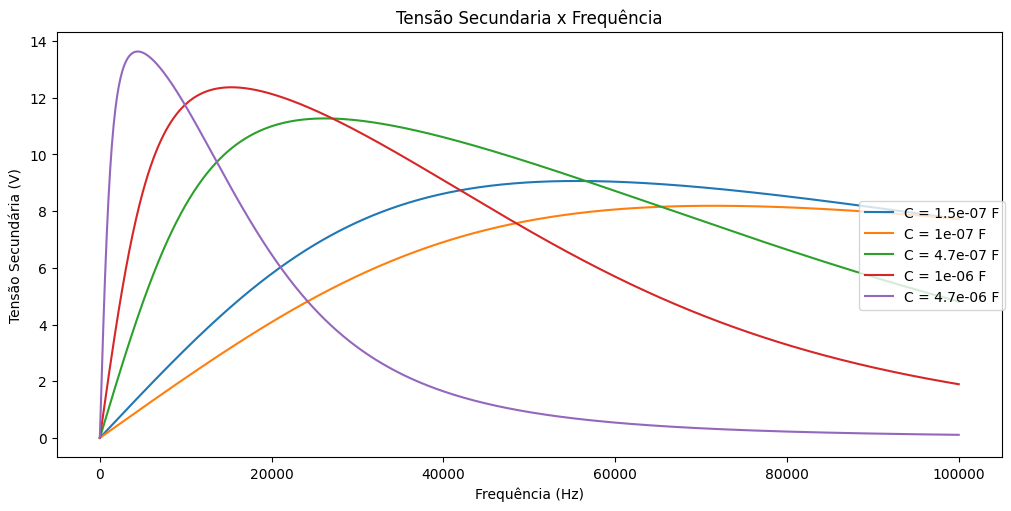

In [184]:
# Lista de capacitores disponíveis
Capacitores = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]

# Lista de frequências para análise
Frequencias = np.linspace(1, 100e3, 1000, endpoint=True)

vMarcaPasso = []
SFonte = []
SMarcaPasso = []
FatorDeEficiencia = []
frequenciaDeRessonancia = {}

fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for c in Capacitores:
	vMarcaPasso.append([])
	SFonte.append([])
	SMarcaPasso.append([])
	FatorDeEficiencia.append([])

	for f in Frequencias:
		w = 2*pi*f
		L = 1/(w*w*c)
		
		rdc = resistenciaBobinaPrimaria + ((2 * resistenciaBobinaPrimaria) / (100 * 10**3) ) * f
		
		i1,i2 = CalcularCorrentesNoTransformador(fonte, carga, rdc, rdc, c, c, L, L, w, fatorDeAcoplamento)
		
		XC2 = 1/(1j*w*c)

		r = (carga*XC2)/(carga+XC2)
		
		# Tensão no marcapasso
		vMarcaPasso[-1].append(abs(i2*r))

		# Potencias do circuito
		SFonte[-1].append((fonte*i1.conjugate()/2).real)
		SMarcaPasso[-1].append(((vMarcaPasso[-1][-1]**2/carga)/2).real)
		FatorDeEficiencia[-1].append((SMarcaPasso[-1][-1]/SFonte[-1][-1]))
	
	frequenciaDeRessonancia[c] = Frequencias[vMarcaPasso[-1].index(max(vMarcaPasso[-1]))]

	ax.plot(Frequencias, vMarcaPasso[-1], label=f"C = {c} F")

fig.legend(loc='center right')
plt.title("Tensão Secundaria x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão Secundária (V)")
plt.show()

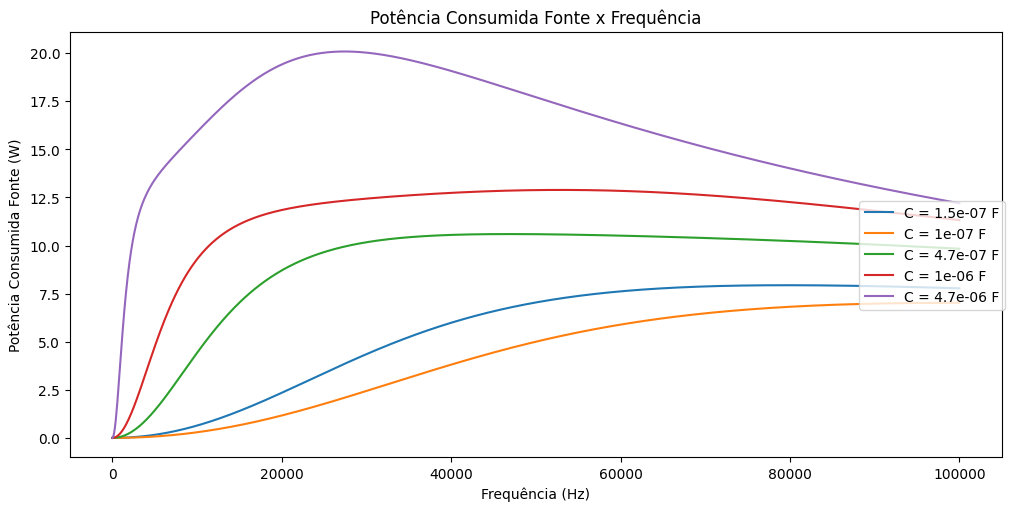

In [185]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Capacitores)):
	ax.plot(Frequencias, SFonte[i], label=f"C = {Capacitores[i]} F")

fig.legend(loc='center right')
plt.title("Potência Consumida Fonte x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Consumida Fonte (W)")
plt.show()

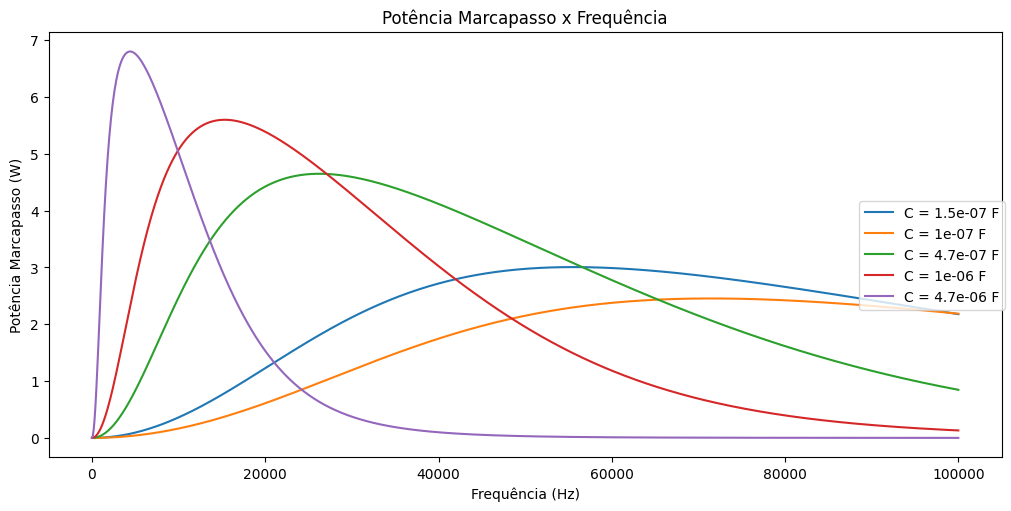

In [186]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Capacitores)):
	ax.plot(Frequencias, SMarcaPasso[i],label=f"C = {Capacitores[i]} F")

fig.legend(loc='center right')
plt.title("Potência Marcapasso x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Marcapasso (W)")
plt.show()

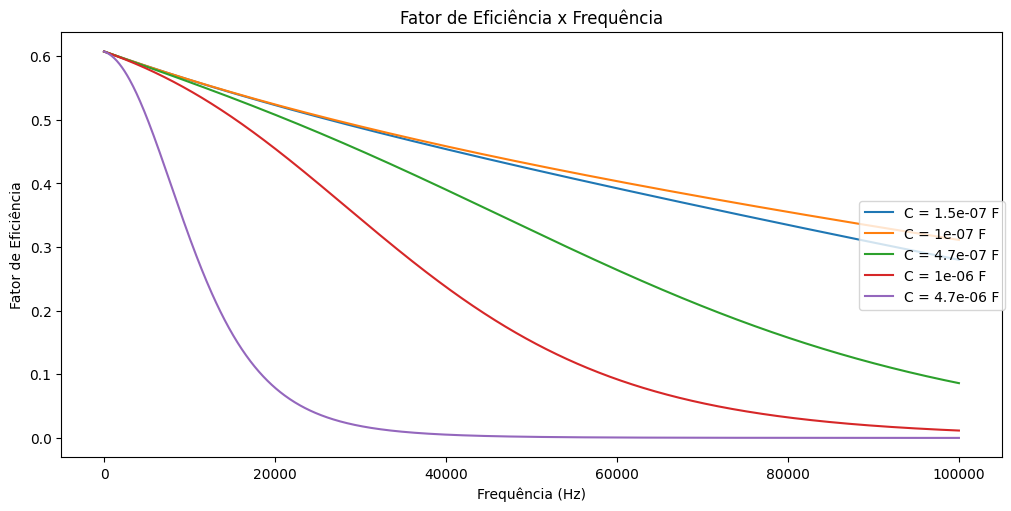

In [187]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

for i in range(len(Capacitores)):
	ax.plot(Frequencias, FatorDeEficiencia[i],label=f"C = {Capacitores[i]} F")

fig.legend(loc='center right')
plt.title("Fator de Eficiência x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fator de Eficiência")
plt.show()

Explicar razão para escolha do capacitor 1e-6 ...

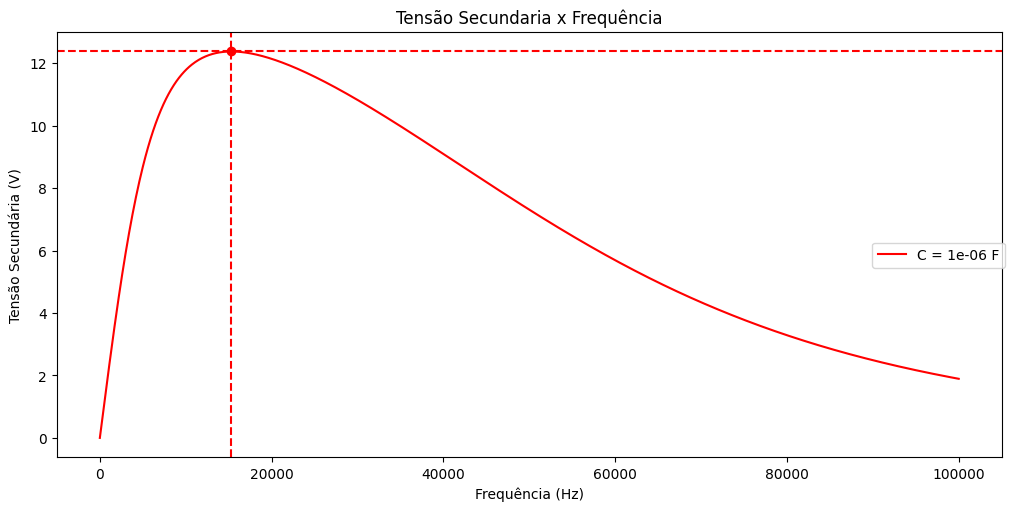

A frequência de ressonância para o capacitor de 1uF é 15316.1622 Hz
A indutância para a frequência de ressonância é 0.1080 mH


In [188]:
# C escolido
c = 1e-6
F = frequenciaDeRessonancia[c]
w = 2*pi*F
L = 1/(w*w*c)

idxC = Capacitores.index(c)
idxF = list(Frequencias).index(F)

vMarcaPasso = vMarcaPasso[idxC]

fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

ax.plot(Frequencias, vMarcaPasso, label=f"C = {c} F", color='red')
ax.plot(F, vMarcaPasso[idxF], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=vMarcaPasso[idxF], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Tensão Secundaria x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão Secundária (V)")
plt.show()

print(f"A frequência de ressonância para o capacitor de 1uF é {F:.4f} Hz")
print(f"A indutância para a frequência de ressonância é {L*1000:.4f} mH")

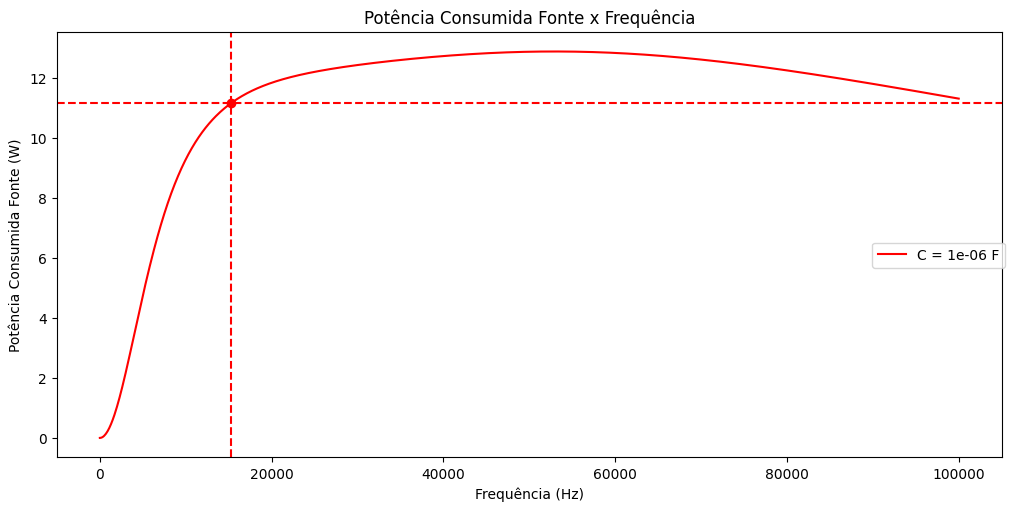

In [189]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

SFonte = SFonte[idxC]

ax.plot(Frequencias, SFonte, label=f"C = {c} F", color='red')
ax.plot(F, SFonte[idxF], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=SFonte[idxF], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Potência Consumida Fonte x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Consumida Fonte (W)")
plt.show()

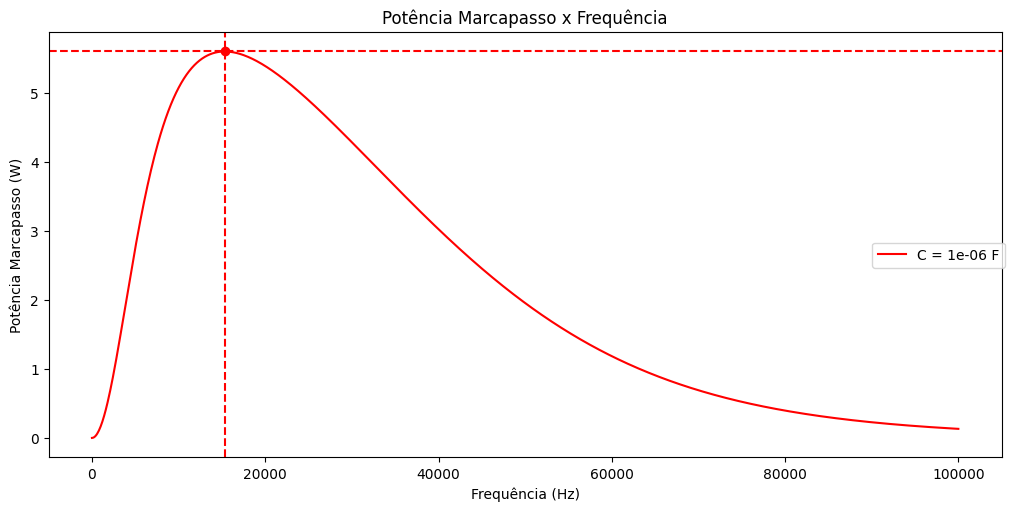

In [190]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

SMarcaPasso = SMarcaPasso[idxC]

ax.plot(Frequencias, SMarcaPasso, label=f"C = {c} F", color='red')
ax.plot(F, SMarcaPasso[idxF], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=SMarcaPasso[idxF], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Potência Marcapasso x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Potência Marcapasso (W)")
plt.show()

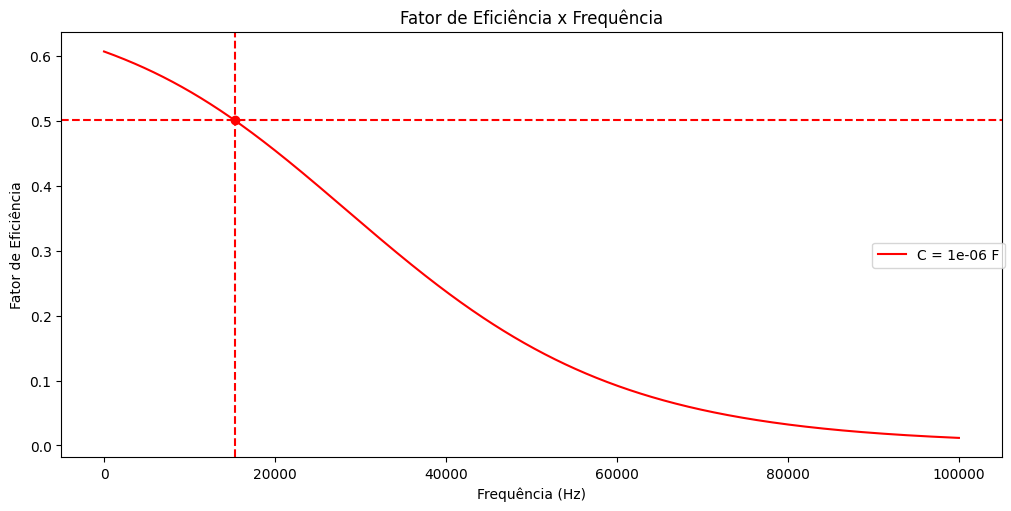

In [191]:
fig, ax = plt.subplots(layout='constrained',figsize=(10,5))

FatorDeEficiencia = FatorDeEficiencia[idxC]

ax.plot(Frequencias, FatorDeEficiencia, label=f"C = {c} F", color='red')
ax.plot(F, FatorDeEficiencia[idxF], 'ro')

plt.axvline(x=F, color='r', linestyle='--')
plt.axhline(y=FatorDeEficiencia[idxF], color='r', linestyle='--')

fig.legend(loc='center right')

plt.title("Fator de Eficiência x Frequência")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Fator de Eficiência")
plt.show()